In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA       


In [238]:
train = pd.read_csv("/Users/seydanurkayir/Desktop/iyzico-datathon/train.csv")
train.head()

,merchant_id,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count
0,merchant_43992,202307,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,15106
1,merchant_43992,202301,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16918
2,merchant_43992,202305,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,13452
3,merchant_43992,202308,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16787
4,merchant_43992,202302,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,12428


In [239]:
train['sub_id'] = train['month_id'].astype(str) + train['merchant_id'].astype(str)
train.head()

,merchant_id,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count,sub_id
0,merchant_43992,202307,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,15106,202307merchant_43992
1,merchant_43992,202301,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16918,202301merchant_43992
2,merchant_43992,202305,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,13452,202305merchant_43992
3,merchant_43992,202308,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16787,202308merchant_43992
4,merchant_43992,202302,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,12428,202302merchant_43992


In [240]:
sub = pd.read_csv("/Users/seydanurkayir/Desktop/iyzico-datathon/sample_submission.csv")
sub.head()

,id,net_payment_count
0,202311merchant_36004,0


In [241]:
train["month_id"] = pd.to_datetime(train["month_id"], format="%Y%m")

train = train.sort_values(by='month_id')
train['month_id'] = train['month_id'].astype('datetime64[ns]')

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291142 entries, 63650 to 291141
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   merchant_id           291142 non-null  object        
 1   month_id              291142 non-null  datetime64[ns]
 2   merchant_source_name  291142 non-null  object        
 3   settlement_period     291142 non-null  object        
 4   working_type          291142 non-null  object        
 5   mcc_id                291142 non-null  object        
 6   merchant_segment      291142 non-null  object        
 7   net_payment_count     291142 non-null  int64         
 8   sub_id                291142 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 22.2+ MB


In [ ]:
#train.index = pd.to_period(train.index, freq='M')

#train.index = pd.to_datetime(train.index)
#month_index = train.index.to_period('M')

#train.index.to_period("M")
#train_index = train['month_id'].strftime('%Y-%m')

In [ ]:
train['month_id']=pd.to_datetime(train['month_id'])
train.set_index('month_id', inplace=True)

train.index

In [215]:
train[["merchant","id"]] = train["merchant_id"].str.split("_", expand=True)


In [216]:
train.drop(['merchant_id','merchant'], axis=1, inplace=True)
train.head()

,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count,sub_id,id
63650,2020-01-01,Merchant Source - 1,Settlement Period - 1,Working Type - 6,mcc_130,Segment - 4,6,202001merchant_66740,66740
85406,2020-01-01,Merchant Source - 1,Settlement Period - 1,Working Type - 2,mcc_153,Segment - 4,3,202001merchant_12444,12444
15264,2020-01-01,Merchant Source - 2,Settlement Period - 1,Working Type - 5,mcc_168,Segment - 4,3,202001merchant_40154,40154
96270,2020-01-01,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_25,Segment - 2,787,202001merchant_33179,33179
31428,2020-01-01,Merchant Source - 2,Settlement Period - 1,Working Type - 6,mcc_31,Segment - 4,5,202001merchant_16977,16977


In [217]:
result = train.sort_values(by=['id'])
result.head()

,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count,sub_id,id
234371,2022-10-01,Merchant Source - 2,Settlement Period - 1,Working Type - 5,mcc_128,Segment - 4,3,202210merchant_1,1
234370,2021-08-01,Merchant Source - 2,Settlement Period - 1,Working Type - 5,mcc_128,Segment - 4,3,202108merchant_1,1
249227,2022-03-01,Merchant Source - 2,Settlement Period - 3,Working Type - 6,mcc_42,Segment - 4,9,202203merchant_10,10
249229,2021-11-01,Merchant Source - 2,Settlement Period - 3,Working Type - 6,mcc_42,Segment - 4,6,202111merchant_10,10
249228,2022-04-01,Merchant Source - 2,Settlement Period - 3,Working Type - 6,mcc_42,Segment - 4,4,202204merchant_10,10


In [ ]:
result = train.groupby('id')
result.describe()

In [218]:
ts = pd.DataFrame({"net_payment_count":result['net_payment_count'],
                  "id":result['id']
                  })
ts.head()

,net_payment_count,id
234371,3,1
234370,3,1
249227,9,10
249229,6,10
249228,4,10


<Axes: >

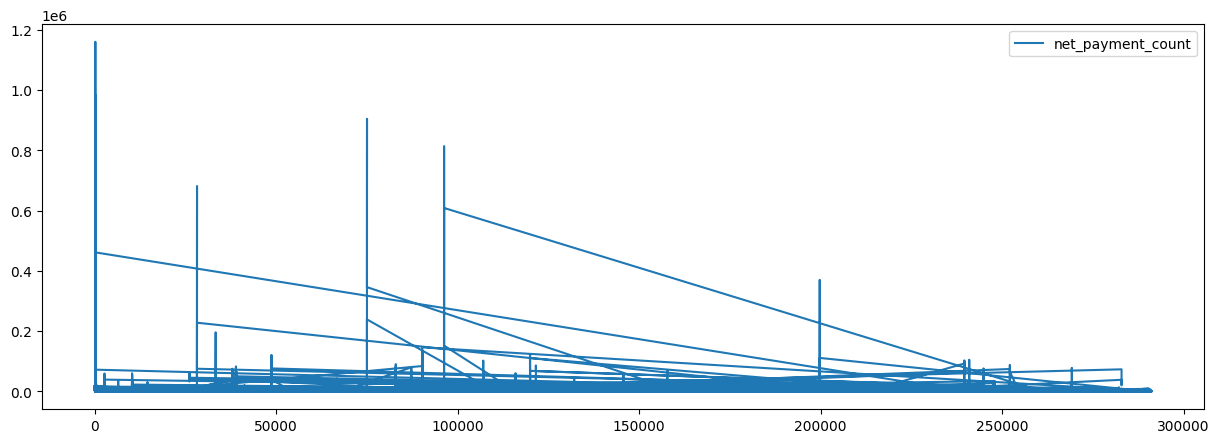

In [219]:
ts.plot(figsize=(15,5))


In [ ]:
plt.figure(figsize=(22,4))
sns.lineplot(data = ts.reset_index(), x="month_id", y="net_payment_count")

In [ ]:
ts.index.sort_values()

/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

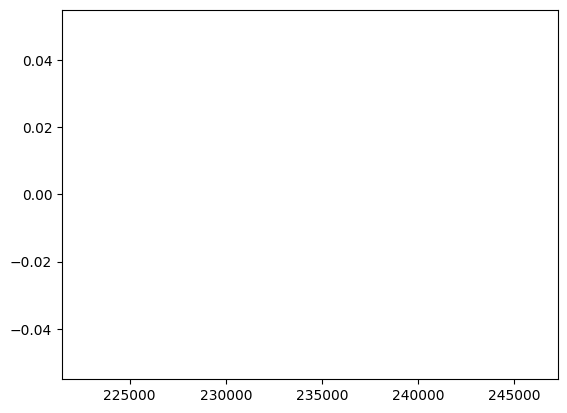

In [222]:
# Tüm ayları içeren bir zaman serisi oluşturun
full_ts = pd.DataFrame(index=ts.index)

# Veri setini aylık olarak birleştirin
df_full = full_ts.merge(ts, how='left', left_index=True, right_index=True)

df_full_filled = df_full.ffill()

# Her bir 'id' için tahmin yapın
unique_ids = df_full_filled['id'].unique()

for merchant_id in unique_ids:
    # Belirli bir 'id' için veriyi seçin
    merchant_data = df_full_filled[df_full_filled['id'] == merchant_id]

    # Log dönüşümü yapın
    ts_log = np.log(merchant_data['net_payment_count'])

    # İlk farkı alın (differencing)
    ts_log_diff = ts_log - ts_log.shift()
    plt.plot(ts_log_diff)
    ts_log_diff.dropna(inplace=True)

    # ARIMA modelini oluşturun ve eğitin
    model = sm.tsa.ARIMA(ts_log, order=(0, 1, 1))
    results_ARIMA = model.fit()

    # Tahminleri alın
    start_date = df_full_filled.index[-3]  # 2023'ün son 3 ayı
    end_date = df_full_filled.index[-1]
    predictions = results_ARIMA.get_forecast(steps=len(ts_log_diff))
    y_pred_df = predictions.conf_int(alpha=0.05)
    y_pred_df["Predictions"] = results_ARIMA.predict(start=start_date, end=end_date)

    # Tahminleri indeks ile eşleştirin
    y_pred_df.index = ts_log.index[1:]  # Fark aldığımız için birinci indeksi atladık
    y_pred_out = np.exp(y_pred_df["Predictions"])  # Eğer log dönüşümü uygulandıysa, orijinal ölçekteki değerlere çevirin

    # Tahminleri DataFrame olarak oluşturun
    prediction_df = pd.DataFrame({
        'Actual_Data': df_full_filled[df_full_filled['id'] == merchant_id]['net_payment_count'][-3:].values,
        'ARIMA_Predictions': y_pred_out.values,
    }, index=ts_log.index[-3:])

    # Tahminleri göster
    print(f"Merchant ID: {merchant_id}")
    print(prediction_df)
    print("\n")

    # İsteğe bağlı: Tahminleri grafik üzerinde göstermek için
    plt.plot(merchant_data['net_payment_count'], label='Actual Data')
    plt.plot(y_pred_out, color='yellow', label='ARIMA Predictions')
    plt.title(f'Merchant ID: {merchant_id}')
    plt.legend()
    plt.show()


In [ ]:
def plot_merchant(ts, id):
    data = ts[ts['id'] == id]
    merchant_data = data.sort_values(by=['month_id'])

    
    ts_log = np.log(merchant_data['net_payment_count'])
    moving_avg = ts_log.rolling(12).mean()
    moving_std = ts_log.rolling(12).std()
    #plt.plot(ts, color='red')
    plt.plot(ts_log, label=f'Merchant ID: {id}')
    plt.plot(moving_avg, color='red', label='Moving Average')
    plt.plot(moving_std, color='yellow', label='Moving Std.')

    plt.legend()
    plt.xlabel('Month')
    plt.ylabel('Net Payment Count')
    plt.title('Zaman Serisi Grafiği')

    plt.show()


plot_merchant(ts,'9965')

In [ ]:
def forecast_merchant(ts, merchant_id, forecast_periods=3):
    data = ts[ts['id'] == merchant_id]
    merchant_data = data.sort_values(by=['month_id'])

    ts_log = np.log(merchant_data['net_payment_count'])

    # ARIMA modelini oluşturun ve eğitin
    model = sm.tsa.ARIMA(ts_log, order=(0, 1, 1))  
    results_ARIMA = model.fit()

    # Tahminleri alın
    forecast = results_ARIMA.get_forecast(steps=forecast_periods)

    # Tahminleri indeks ile eşleştirin
    forecast_index = pd.date_range(start=ts_log.index[-1], periods=forecast_periods+1, freq='MS')[1:]
    #forecast_index = forecast_index.strftime('%Y-%m')

    forecast_values = np.exp(forecast.predicted_mean)
    # Tahminleri DataFrame olarak oluşturun
    forecast_df = pd.DataFrame({
        'Forecast': forecast_values,
    }, index=forecast_index)

    # Tahminleri göster
    print(f"Forecast for Merchant ID {merchant_id}:\n")
    print(forecast_df)

    # Grafik üzerinde gösterim
    plt.plot(ts_log, label=f'Merchant ID: {merchant_id}')
    plt.plot(np.exp(results_ARIMA.fittedvalues), color='red', label='Fitted Values')
    plt.plot(forecast_df, color='green', linestyle='--', label='Forecast')
    plt.legend()
    plt.xlabel('Month')
    plt.ylabel('Net Payment Count')
    plt.title('ARIMA Modeli Tahminleri')

    plt.show()

# Belirli bir 'id' için 3 aylık tahmin yapın
forecast_merchant(ts, '9965', forecast_periods=3)

In [ ]:
merchant_data = ts[ts['id'] == '33179'].sort_values(by=['month_id'])
merchant_data.head()


In [ ]:
forecast_periods=3
# Tüm ayları içeren bir zaman serisi oluşturun
#full_date_range = pd.date_range(start='2020-01-01', end='2023-07-01', freq='MS')
forecast_index = pd.date_range(start=ts_log.index[-1], periods=forecast_periods+1, freq='MS')[1:]

full_ts = pd.DataFrame(index=forecast_index)

# Veri setini aylık olarak birleştirin
df_full = full_ts.merge(ts, how='left', left_index=True, right_index=True)

# Eksik verileri doldurun (örneğin, forward fill)
df_full_filled = df_full.ffill()

# Belirli bir 'id' için veriyi seçin
merchant_id = 33179
merchant_data = df_full_filled[df_full_filled['id'] == merchant_id]

# Log dönüşümü yapın
ts_log = np.log(merchant_data['net_payment_count'])

# İlk farkı alın (differencing)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
ts_log_diff.dropna(inplace=True)

# ARIMA modelini oluşturun ve eğitin
model = sm.tsa.ARIMA(ts_log, order=(0, 1, 1))
results_ARIMA = model.fit()

# Tahminleri alın
start_date = df_full_filled.index[-3]  # 2023'ün son 3 ayı
end_date = df_full_filled.index[-1]
predictions = results_ARIMA.get_forecast(steps=len(ts_log_diff))
y_pred_df = predictions.conf_int(alpha=0.05)
y_pred_df["Predictions"] = results_ARIMA.predict(start=start_date, end=end_date)

# Tahminleri indeks ile eşleştirin
y_pred_df.index = ts_log.index[1:]  # Fark aldığımız için birinci indeksi atladık
y_pred_out = np.exp(y_pred_df["Predictions"])  # Eğer log dönüşümü uygulandıysa, orijinal ölçekteki değerlere çevirin

# Tahminleri DataFrame olarak oluşturun
prediction_df = pd.DataFrame({
    'Actual_Data': df_full_filled[df_full_filled['id'] == merchant_id]['net_payment_count'][-3:].values
}, index=ts_log.index[-3:])

# Tahminleri göster
print(prediction_df)

In [227]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

merchant_data = ts[ts['id'] == '33179']

data = merchant_data['net_payment_count']
seasonal = True

model = pm.auto_arima(data, 
                      m=12,               # frequency of series                      
                      seasonal=seasonal,  # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=0, # minimum p and q
                      max_p=3, max_q=3,   # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

#print model summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1257.380, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1255.136, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1249.738, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1233.400, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1253.184, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1231.933, Time=0.11 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1233.045, Time=0.21 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1233.959, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1236.198, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1248.102, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1234.853, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1227.227, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1228.777, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12]

In [ ]:
model.summary()


/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/pandas/core/indexes/base.py:911: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


AttributeError: module 'pandas' has no attribute 'rolling_mean'

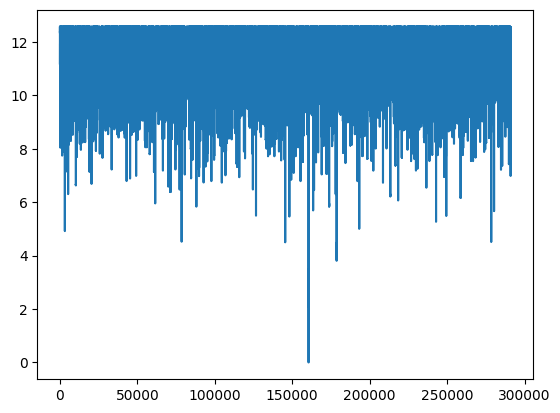

In [236]:

#This block worked as expected and created a simple time series'able data frame for me
ts_TS = ts.index

#tested for stationarity (it was not stationary). not including code for brevity

#There is clearly an upward trend in the line chart, which breaks stationarity rules. So lets transform with log
TS_log = np.log(ts_TS)
plt.plot(TS_log)

#In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics.
moving_avg = pd.rolling_mean(TS_log,12)
plt.plot(TS_log)
plt.plot(moving_avg, color='red')

#The red line above shows the rolling mean. Lets subtract this from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values
homepriceTS_log_moving_avg_diff = TS_log - moving_avg
homepriceTS_log_moving_avg_diff.head(n=12)

#Drop the first 11 NaN rows since we chose a 12 month roll. Then we'll test for stationarity again.
homepriceTS_log_moving_avg_diff.dropna(inplace=True)
homepriceTS_log_moving_avg_diff.head()

#tested for stationarity again. It was much better, so I'll go with it.

homepriceTS_log_diff = TS_log - TS_log.shift()
plt.plot(homepriceTS_log_diff)

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

# I wanted to use method = 'ols'... but it just kept throwing me errors so I gave up and used 'yw' (not even sure if that makes sense to do in this case)
lag_acf = acf(homepriceTS_log_diff, nlags=12)
lag_pacf = pacf(homepriceTS_log_diff, nlags=12, method='yw')

In [ ]:
prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)

prediction

In [ ]:

model = sm.tsa.arima.ARIMA(ts_log, order=(0, 1, 1))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [ ]:

y_pred = results_ARIMA.get_forecast(steps = 3)
#forecast = forecast_result.predicted_mean
y_pred

In [ ]:
#y_pred = model.get_forecast(len(ts.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = results_ARIMA.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = ts.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()

In [ ]:
# İlk farkı alalım (differencing)
ts_log_diff = ts_log.diff().dropna()

# ARIMA modelini oluşturun ve eğitin
model = sm.tsa.ARIMA(ts_log, order=(0, 1, 1))
results_ARIMA = model.fit()

# Tahminleri alın
y_pred = results_ARIMA.get_forecast(steps=len(ts_log_diff))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df["Predictions"] = results_ARIMA.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])

# Tahminleri indeks ile eşleştirin
y_pred_df.index = ts_log.index[1:]  # Fark aldığımız için birinci indeksi atladık
y_pred_out = np.exp(y_pred_df["Predictions"])  # Eğer log dönüşümü uygulandıysa, orijinal ölçekteki değerlere çevirin

# Grafik çizimi
plt.plot(ts, label='Actual Data')
plt.plot(y_pred_out, color='yellow', label='ARIMA Predictions')
plt.legend()
plt.show()

In [ ]:
y_pred_df["Predictions"]

In [ ]:
y_pred_df

In [ ]:
print(ts_log.index)


In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)


predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [ ]:
dategroup=ts.groupby(ts.index).mean()
plt.figure(figsize=(12,5))
dategroup['net_payment_count'].plot(x=ts.index)
plt.title('Time Series')